# Assignment 2 - Logistic Regression
> **FULL MARKS = 10**

In this assignment, you are going to implement your own logistic Regression function. Please notice **no** library versions of logistic regression are allowed. Follow the instructions, you will need to fill the blanks to make it functional. The process is similar to the previous assignment. 

***Initialization***

*No more library allowed*

In [151]:
# load required library
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
import scipy.optimize as opt

Load data *(Do not modify)*
_________

We use 100 samples and 2 features. 


In [152]:
x, y = load_iris(return_X_y=True)

In [153]:
x=x[:100, :2] # class 0 and 1 balanced
y=y[:100]

**Visualize data**
___________

In [154]:
# draw raw data
def draw_data(x,y):
    fig, ax = plt.subplots()
    mark = ['x','.']
    labels = ['class 0', 'class 1']
    color = ['red','blue']
    for g in np.unique(y):
        ix = np.where(y == g)
        ax.scatter(x[ix,0], x[ix,1], label = g, s = 100, marker=mark[g],c = color[g])
    ax.legend(labels)
    plt.xlabel('xlabel')
    plt.ylabel('ylabel')
    plt.title('title',fontsize = 20,pad = 20)
    plt.show()
    
    #########################################################################
    # Full Mark: 1                                                          #    
    # TODO:                                                                 #
    # 1. make a scatter plot of the raw data                                #
    # 2. set title for the plot                                             #
    # 3. set label for x,y axis                                             #
    # Note, this scatter plot has two different type of points              #
    #########################################################################



    #########################################################################
    #                       END OF YOUR CODE                                #
    #########################################################################

    # show plot


Your plot should be similar to the example below

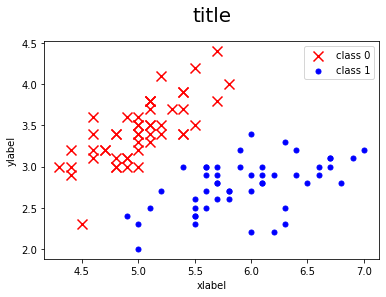

In [155]:
draw_data(x,y)

**Sigmoid function**
________________

In [156]:
# please do not modify this cell
x = np.concatenate((np.array([np.ones(len(y))]).T, x), axis=1)
theta = np.zeros(x.shape[1])

**You can decide by yourselves whether to split the dataset to training and testing. The training and testing datasets spliting is not a part of the assignment 2 as you have done that in assignmnet 1. Without spliting, you can just report the accuracy on training dataset. **

In [157]:
# define sigmoid function
# math: refer to https://en.wikipedia.org/wiki/Sigmoid_function or slides
def sigmoid(theta, X):
    h = np.dot(X, theta)
    s = 1/ (1 + np.exp(-h))
    #########################################################################
    # FullS  Mark: 1                                                          # 
    # TODO:                                                                 #
    # 1. implement the sigmoid function over input theta and X
    #########################################################################
    #########################################################################
    #                       END OF YOUR CODE                                #
    #########################################################################
    return s

**Cost function**
____________

In [164]:
# define cost function with sigmoid function
def cost(theta, X, y):
    m = x.shape[0]
    co = -(1 / m) * np.sum(
        y * np.log(sigmoid(theta, x)) + (1 - y) * np.log(
            1 - sigmoid(theta, x)))
    return co
    #########################################################################
    # Full Mark: 2                                                          # 
    # TODO:                                                                 #
    # 1. implement the cross entropy loss function with sigmoid             #
    #########################################################################
    
    #########################################################################
    #                       END OF YOUR CODE                                #
    #########################################################################


**Calculate gradients**
________________

In [165]:
# the gradient of the cost is a vector of the same length as θ where the jth element (for j = 0, 1, . . . , n)
def gradient(theta, X, y):
    m = X.shape[0]
    grad = (1 / m) * np.dot(x.T, sigmoid(theta,   X) - y)
    return grad
    #########################################################################
    # Full Mark: 2                                                          # 
    # TODO:                                                                 #
    # 1. calculate the gradients using theta and sigmoid                    #
    # Hint: X may need to be transposed to do matrix operation              #
    #########################################################################
    
    #########################################################################
    #                       END OF YOUR CODE                                #
    #########################################################################
    

**Predicting**
________________

In [166]:
# predict for new X
def predict(theta, X):
    h = sigmoid(theta, X)
    predict_labels = np.round(h).astype(int)
    return predict_labels
    #########################################################################
    # Full Mark: 1                                                          # 
    # TODO:                                                                 #
    # 1. predict the value using theta and sigmoid                          #
    # 2. convert the predicted value to 0/1                                 #
    # That's how it is called Logistic regression                           #
    #########################################################################
    
    #########################################################################
    #                       END OF YOUR CODE                                #
    #########################################################################

  

**Calculate accuracy**
________________

In [161]:
# calculate accuracy
def accurate(predictions, y):
    accuracy_score = np.mean(predictions == y) * 100
    return accuracy_score
    #########################################################################
    # Full Mark: 1                                                          # 
    # TODO:                                                                 #
    # 1. calculate the accuracy value                                       #
    # Note that you coud not import extra library                           #
    #########################################################################
    
    #########################################################################
    #                       END OF YOUR CODE                                #
    #########################################################################
  

**Calling functions**
________

In [167]:
# please do not modify this cell
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(x, y))
final_theta = result[0]
final_cost = cost(final_theta, x, y)
predictions = predict(final_theta, x)
accuracy = accurate(predictions, y)
print("final cost is " + str(final_cost))
print("accuracy is " + str(accuracy))

final cost is 0.05171662353011455
accuracy is 99.0


C:\Users\Akshay t\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
C:\Users\Akshay t\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  


**Decsion boudary** 

In [168]:
final_theta

array([-2.06867851,  5.37100885, -8.72280794])

In [169]:
# draw decision boudary
def draw_decision_boudary(final_theta,x,y):
    fig, ax = plt.subplots()
    mark = ['x','.']
    labels = ['class 0', 'class 1']
    color = ['red','blue']
    for g in np.unique(y):
        ix = np.where(y == g)
        ax.scatter(x[ix,1], x[ix,2], label = g, s = 50, marker=mark[g],c = color[g])
    ax.legend(labels)
    plt.xlabel('xlabel')
    plt.ylabel('ylabel')
    plt.title('title',fontsize = 20,pad = 20)
    plot_x = ([min(x[:,1]) - 2, max(x[:,1]) + 2])
    plot_y =((-1/final_theta[2]) * (np.dot((final_theta[1]),(plot_x)) + final_theta[0]))
    plt.plot(plot_x, plot_y, label = "Decision_Boundary")
    plt.show()

Your plot should be similar to the example below

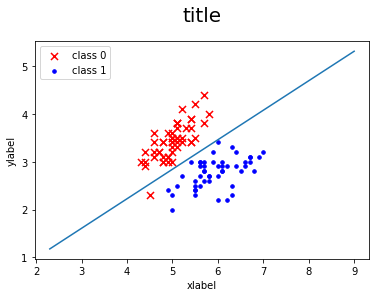

In [170]:
draw_decision_boudary(final_theta,x,y)